## Importing the Data

In [61]:
import pandas as pd
beer_df = pd.read_csv('beer_data_cleaned8-1.csv')
beer_df.head() 

C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (30,31,43,46,47,51,54,59,62,67,70,71,75,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,url,Batch_Style,Category,Batch_size_liters,og,fg,abv,ibu,...,Adjunct4Amount,Adjunct4Name,Adjunct4Type,Adjunct4Timing,Adjunct4Time,Adjunct5Amount,Adjunct5Name,Adjunct5Type,Adjunct5Timing,Adjunct5Time8
0,96591,Invitro - Salmiakkporter,/homebrew/recipe/view/739473/invitro-salmiakk...,All Grain,American Porter,45.0,1.062,1.017,5.88,27.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,87773,Sour Distancing - Mulberry & Cardamom Kettle ...,/homebrew/recipe/view/958877/sour-distancing-...,BIAB,Fruit and Spice Beer,28.5,1.061,1.014,6.13,11.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115813,Apricot Wheat,/homebrew/recipe/view/885962/apricot-wheat,All Grain,Fruit Beer,26.0,1.053,1.015,4.99,15.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104677,40. Dark Side ACBC,/homebrew/recipe/view/125648/40-dark-side-acbc,All Grain,Oatmeal Stout,30.0,1.078,1.021,7.54,40.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,177917,Dbl batch - NEIPA Juicy-G Mango July 20,/homebrew/recipe/view/1018100/dbl-batch-neipa...,All Grain,American IPA,45.0,1.065,1.019,6.09,41.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Looking at Data Structure

In [62]:
#useful for getting quick description of data, total number of rows, each attribute's type, number of nonnull values
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96728 entries, 0 to 96727
Columns: 103 entries, id to Adjunct5Time8
dtypes: float64(25), int64(2), object(76)
memory usage: 76.0+ MB


In [63]:
#Can be used to look at categorical sums
pd.set_option('display.max_rows', 500) #change settings to output more
beer_df.isnull().sum().sort_values(ascending=False)
#missing values is pretty huge for this dataset but makes sense. I think it's okay for the hops to have missing values EXCEPT for hop1 amount, we can input the mean there
beer_df['hop1amount'].fillna(beer_df['hop1amount'].mean(), inplace=True)
beer_df.isnull().sum().sort_values(ascending=False)


Adjunct5Time8               93297
Adjunct5Type                93297
Adjunct5Name                93297
Adjunct5Timing              93297
Adjunct4Amount              91672
Adjunct4Time                91173
Adjunct4Timing              91173
Adjunct4Type                91173
Adjunct4Name                91173
Adjunct5Amount              90661
Adjunct3Type                87418
Adjunct3Amount              87418
Adjunct3Name                87418
Adjunct3Timing              87418
Adjunct3Time                87418
hop5name                    85199
hop5type                    85199
hop5alpha                   85199
hop5timing                  85199
hop5time                    85199
hop5ibu                     85199
hop5percent                 85199
Adjunct2Time                84936
Adjunct2Timing              84936
Adjunct2Type                84936
Adjunct2Name                84936
Adjunct2Amount              84936
Adjunct1Name                84765
Adjunct1Type                84765
Adjunct1Timing

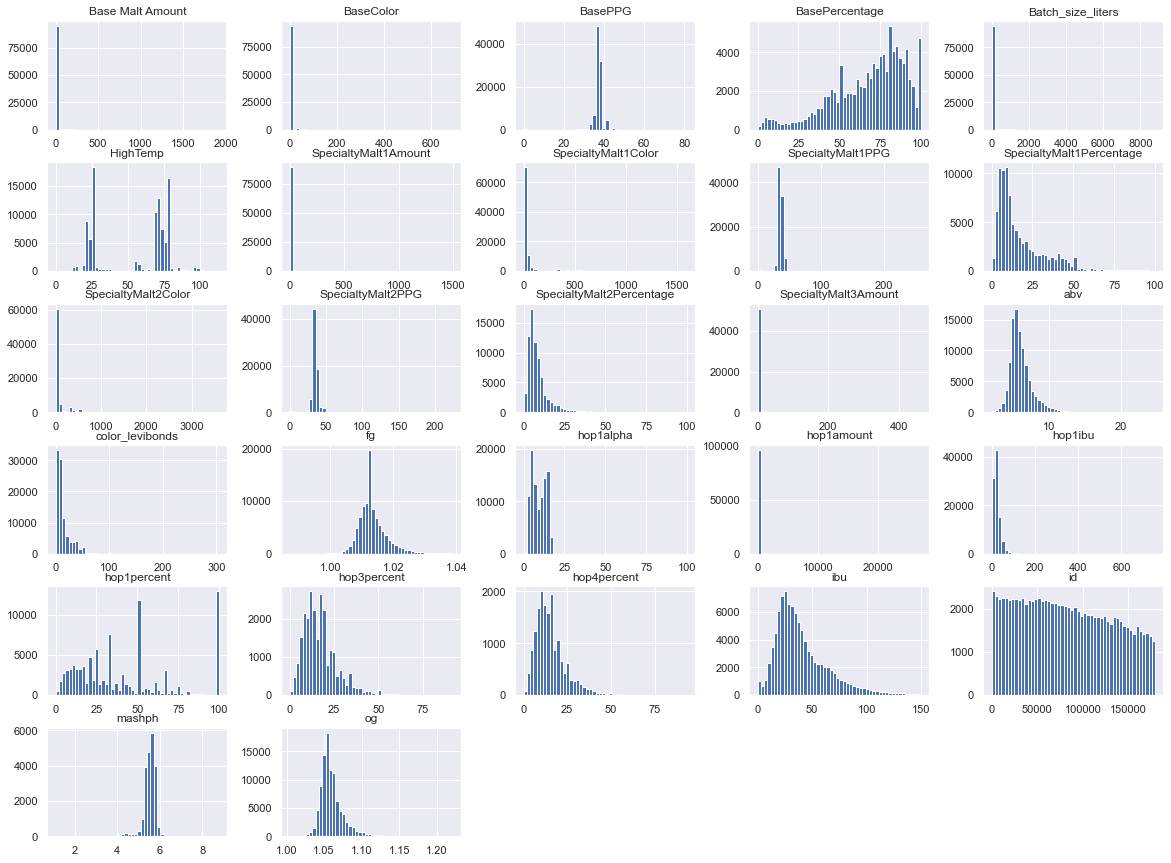

In [64]:
#Plotting the dataset at large
#plots a histogram for each numerical feature
%matplotlib inline
import matplotlib.pyplot as plt
beer_df.hist(bins=50, figsize=(20,15))
plt.show()

Notes:
1. There seems to be a natural divide in the HighTemp variable, could that help with Celcius vs Fahrenheit?
3. Attributes that have different scales will need feature scaling
4. Tail-heavy histograms: may need transformations (log)

## Create a Test Set

In [65]:
#Doing it at this time helps to avoid overfitting or picking the wrong architexture based on bias
#function for test set creation:
import numpy as np

def split_train_test(beer_df, test_ratio):
    np.random.seed(33)
    shuffled_indices = np.random.permutation(len(beer_df))           #shuffles the dataset
    test_set_size = int(len(beer_df) * test_ratio)                   #calculates test size based on ratio (often 20%)
    test_indices = shuffled_indices[:test_set_size]               #selects test set and from incdices
    train_indices = shuffled_indices[test_set_size:]              #assigns the rest to training
    return beer_df.iloc[train_indices], beer_df.iloc[test_indices]      #returns two different dfs for test and train
    
#Using the function
train_set, test_set = split_train_test(beer_df, 0.2)

In [66]:
print(len(train_set), len(test_set))

77383 19345


In [67]:
train_set.to_csv('beer_data_train.csv')
test_set.to_csv('beer_data_test.csv')

## Discover and Visualize the Data to Gain Insights

In [68]:
cats = beer_df['Category'].value_counts()
print(cats)

 American IPA                          15949
 American Pale Ale                     10918
 Saison                                 3085
 Blonde Ale                             2910
 American Amber Ale                     2635
 American Light Lager                   2246
 Weissbier                              1988
 American Stout                         1763
 Irish Red Ale                          1699
 Witbier                                1613
 Sweet Stout                            1316
 Oatmeal Stout                          1281
 American Brown Ale                     1280
 American Porter                        1270
 Kolsch                                 1198
 Imperial IPA                           1175
 Russian Imperial Stout                 1132
 Imperial Stout                         1122
 American Wheat Beer                    1113
 Cream Ale                              1106
 English IPA                            1025
 Double IPA                              947
 Robust Po

In [69]:
len(cats) #166 categories

166

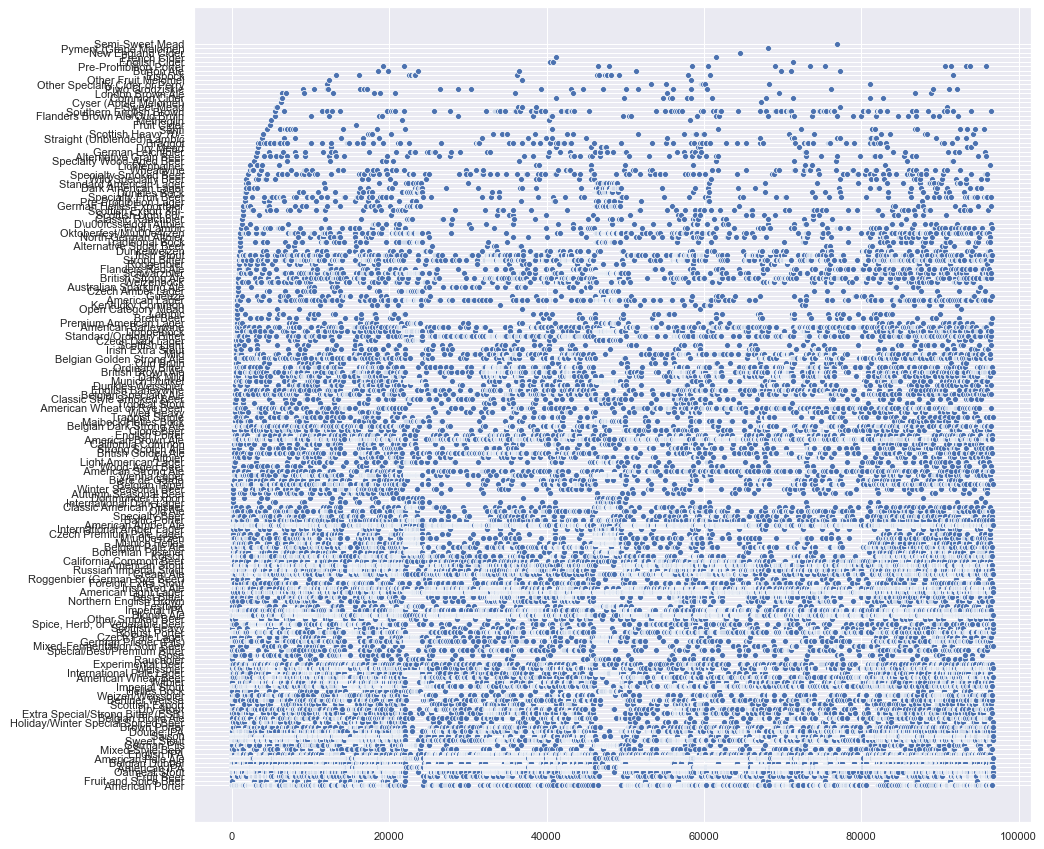

In [70]:
import seaborn as sns #attempting to visualize Category variable
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=beer_df['Category'],hue='green')

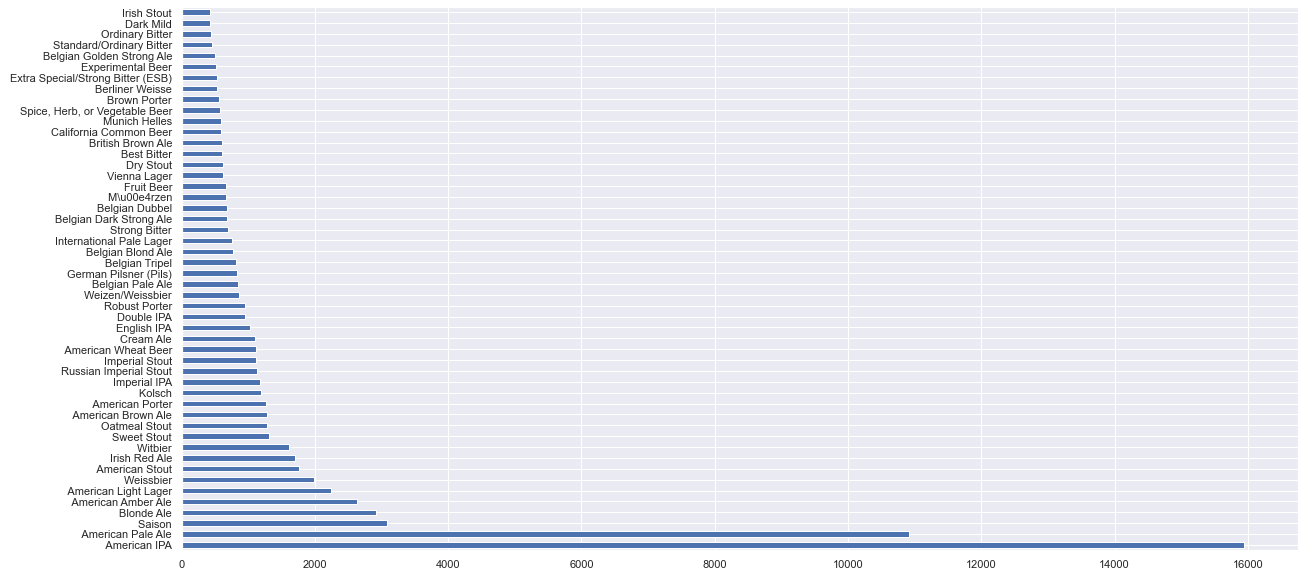

In [71]:
beer_df['Category'].value_counts().head(50).plot(kind='barh',figsize=(20,10)) #top 50 categories